In [28]:
from portfolio_optimizer.PortfolioOptimizer import PortfolioOptimizer
import pandas as pd
from portfolio_optimizer.stock_choice import MLChoice
from portfolio_optimizer.weight_allocators import SimpleAllocator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
import pickle

model = pickle.load(open("experiments/models/MLChoice-xgboost-60-fixed.sav", 'rb'))

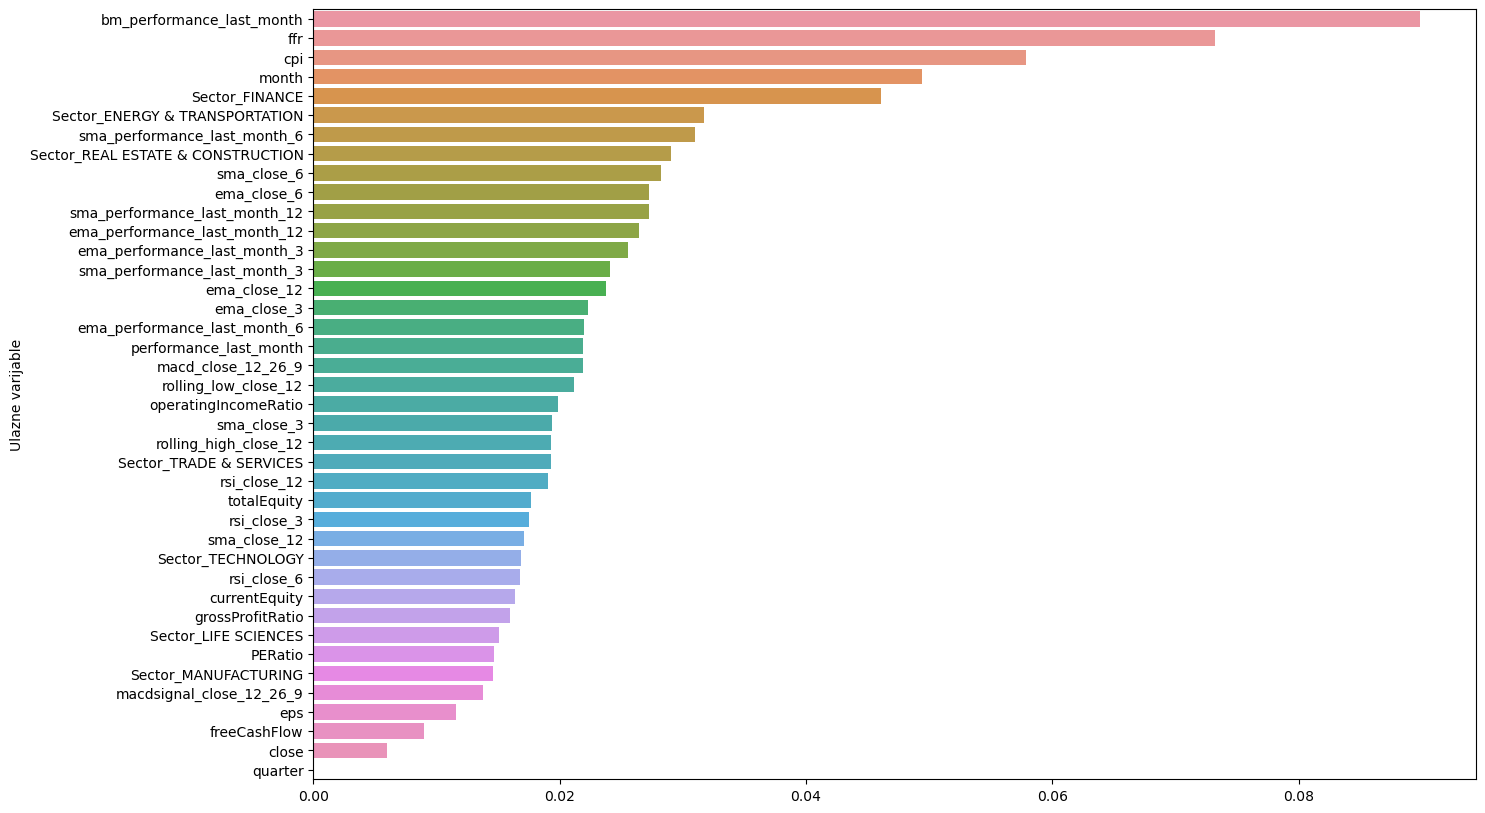

In [30]:
fig = plt.figure(figsize=(15, 10))

features = []
for elem in model.feature_names_in_:
    if "Sector" in elem:
        features.append("Sektor")
    elif "bm" in elem or "ffr" in elem or "cpi" in elem:
        features.append("Makroekonomski indikator")
    elif "3" in elem or "6" in elem or "12" in elem or "close" in elem or "performance" in elem:
        features.append("Tehnički indikator")
    elif "month" in elem or "quarter" in elem:
        features.append("Vremenski indikator")
    else:
        features.append("Financijski indikator")

#create a dataframe with the variable importances of the model
df_importances = pd.DataFrame({
    'feature': model.feature_names_in_,
    'feature_class': features,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False).reset_index()

ax = sns.barplot(x=df_importances.importance, y=df_importances.index, orient='h')
ax.set_yticklabels(df_importances.feature)
plt.ylabel('Ulazne varijable')
plt.xlabel("")
plt.show()

In [31]:
df_importances["feature"].to_list()

['bm_performance_last_month',
 'ffr',
 'cpi',
 'month',
 'Sector_FINANCE',
 'Sector_ENERGY & TRANSPORTATION',
 'sma_performance_last_month_6',
 'Sector_REAL ESTATE & CONSTRUCTION',
 'sma_close_6',
 'ema_close_6',
 'sma_performance_last_month_12',
 'ema_performance_last_month_12',
 'ema_performance_last_month_3',
 'sma_performance_last_month_3',
 'ema_close_12',
 'ema_close_3',
 'ema_performance_last_month_6',
 'performance_last_month',
 'macd_close_12_26_9',
 'rolling_low_close_12',
 'operatingIncomeRatio',
 'sma_close_3',
 'rolling_high_close_12',
 'Sector_TRADE & SERVICES',
 'rsi_close_12',
 'totalEquity',
 'rsi_close_3',
 'sma_close_12',
 'Sector_TECHNOLOGY',
 'rsi_close_6',
 'currentEquity',
 'grossProfitRatio',
 'Sector_LIFE SCIENCES',
 'PERatio',
 'Sector_MANUFACTURING',
 'macdsignal_close_12_26_9',
 'eps',
 'freeCashFlow',
 'close',
 'quarter']

In [32]:
indicators_full_names = [
    'Povrat S\&P500 indeksa proteklog mjeseca',
    'Kamatne stope američkih banaka',
    'Indeks snage potrošača',
    'Mjesec',
    'Sektor FINANCIJE',
    'Sektor ENERGIJA I TRANSPORT',
    'Jednostavni pomični prosjek povrata na kraju mjeseca(6 mjeseci unazad)',
    'Sektor NEKRETNINE I GRAĐEVINA',
    'Jednostavni pomični prosjek cijene na kraju mjeseca (6 mjeseci unazad)',
    'Eksponencijalno težinski pomični prosjek cijene na kraju mjeseca (6 mjeseci unazad)',
    'Jednostavni pomični prosjek povrata na kraju mjeseca(12 mjeseci unazad)',
    'Eksponencijalno težinski pomični prosjek povrata na kraju mjeseca(12 mjeseci unazad)',
    'Eksponencijalno težinski pomični prosjek povrata na kraju mjeseca(3 mjeseci unazad)',
    'Jednostavni pomični prosjek povrata na kraju mjeseca(3 mjeseci unazad)',
    'Eksponencijalno težinski pomični prosjek cijene na kraju mjeseca (12 mjeseci unazad)',
    'Eksponencijalno težinski pomični prosjek cijene na kraju mjeseca (3 mjeseci unazad)',
    'Eksponencijalno težinski pomični prosjek povrata na kraju mjeseca(6 mjeseci unazad)',
    'Povrat proteklog mjeseca',
    'MACD pokazatelj za cijenu na kraju mjeseca (12, 26, 9)',
    'Najmanja cijena na kraju mjeseca (12 mjeseci unazad)',
    'Omjer operativnog prihoda',
    'Jednostavni pomični prosjek cijene na kraju mjeseca (3 mjeseci unazad)',
    'Najviša cijena na kraju mjeseca (12 mjeseci unazad)',
    'Sektor TRGOVINA I USLUGE',
    'Indeks relativne snage za cijenu na kraju mjeseca (12 mjeseci unazad)',
    'Ukupna imovina',
    'Indeks relativne snage za cijenu na kraju mjeseca (3 mjeseci unazad)',
    'Jednostavni pomični prosjek cijene na kraju mjeseca (12 mjeseci unazad)',
    'Sektor TEHNOLOGIJA',
    'Indeks relativne snage za cijenu na kraju mjeseca (6 mjeseci unazad)',
    'Trenutna imovina',
    'Omjer bruto profita',
    'Sektor BIOMEDICINA',
    'Omjer cijene i zarade',
    'Sektor PROIZVODNJA',
    'Signal MACD pokazatelja za cijenu na kraju mjeseca (12, 26, 9)',
    'Zarada po dionici',
    'Slobodni novčani tok',
    'Cijena na kraju mjeseca',
    'Kvartal'
]



In [34]:
len(indicators_full_names)

40

In [33]:
for i, j, k in zip(df_importances["feature"].to_list(), indicators_full_names, df_importances["feature_class"].to_list()):
    new_i = i.replace('_', '\\_').replace('&', '\\&')
    print(f"{new_i} & {j} & {k}\\\\")
    print("\hline")

bm\_performance\_last\_month & Povrat S\&P500 indeksa proteklog mjeseca & Makroekonomski indikator\\
\hline
ffr & Kamatne stope američkih banaka & Makroekonomski indikator\\
\hline
cpi & Indeks snage potrošača & Makroekonomski indikator\\
\hline
month & Mjesec & Vremenski indikator\\
\hline
Sector\_FINANCE & Sektor FINANCIJE & Sektor\\
\hline
Sector\_ENERGY \& TRANSPORTATION & Sektor ENERGIJA I TRANSPORT & Sektor\\
\hline
sma\_performance\_last\_month\_6 & Jednostavni pomični prosjek povrata na kraju mjeseca(6 mjeseci unazad) & Tehnički indikator\\
\hline
Sector\_REAL ESTATE \& CONSTRUCTION & Sektor NEKRETNINE I GRAĐEVINA & Sektor\\
\hline
sma\_close\_6 & Jednostavni pomični prosjek cijene na kraju mjeseca (6 mjeseci unazad) & Tehnički indikator\\
\hline
ema\_close\_6 & Eksponencijalno težinski pomični prosjek cijene na kraju mjeseca (6 mjeseci unazad) & Tehnički indikator\\
\hline
sma\_performance\_last\_month\_12 & Jednostavni pomični prosjek povrata na kraju mjeseca(12 mjeseci unaza